# Food Environmental Impact
## ILV Datenvisualisierung und Visual Analytics
## Christina Köck
## Februar 2023
### Link to the Gitlab-Repo: https://gitlab.web.fh-kufstein.ac.at/christina.koeck/datenvisualisierung_und_visualanalytics

Die Visualisierungen werden in diesem Notebook erstellt. Designentscheidungen werden hier dokumentiert. Nach der Entwicklung wird der Code in eine streamlit-Anwendung für das Dashboarding übertragen.

Die Streamlit-Anwendung ist für interessierte Verbaucher mit leicht wissenschaftlichem Hintergrund gedacht. Die Informationen sollten für VerbraucherInnen verständlich sein, allerdings sind gewisse Kenntnisse zu den Nachhaltigkeitsparamtern vorausgesetzt. Besonders die Darstellung der Korrelation setzt Kenntnisse der Pearson-Korrelation voraus. Die Streamlit-Anwendung könnte auch im Unterricht verwendet werden, um Lernenden verschiedene Ernährungsformen näherzubringen. Die Anwendung ist so gestaltet, dass sie mit verschiedenen Fragen durch die Daten führt. Somit soll auf verschiedene Aspekte und Zusammenhänge hingewiesen werden. Die NutzerInnen können dabei selbst wählen, welche Lebenmittel dargestellt werden sollen.

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Libraries and data

In [2]:
from cmcrameri import cm
import math as math
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
from colors_cameri import davos

import missingno as msno

In [3]:
# Data are from:
# ZHAE database mix from end of 2022
df_studies = pd.read_excel("study_data.xlsx")
df_studies.rename(columns={"Unnamed: 0": "source"}, inplace=True)

In [4]:
df_studies.set_index('source', inplace = True)

In [5]:
df_studies['Datum der Studie (Jahr)']= pd.to_datetime(df_studies['Datum der Studie (Jahr)'])

### Short EDA

In [6]:
df_studies

,FOODON,Studie,Erfasst durch,Datum der Studie (Jahr),Systemgrenzen/Beschreibung,Geography,Funktionelle Einheit,"Anbau (Pestizide, Dünger, ...) - für pflanzliche LM","Aufzucht (Futter, Platz, …) - für tierische LM",Allokation (ökonomisch oder energiegerichtet),...,Zinc (mg/100g),Iron (mg/100g),Copper (mg/100g),Manganese (mg/100g),Calcium (mg/100g),Chloride (mg/100g),Potassium (mg/100g),Sodium (mg/100g),Phosphorus (mg/100g),Selenium (mg/100g)
source,,,,,,,,,,,,,,,,,,,,,
mealworm,2524,https://link.springer.com/article/10.1007/s113...,NaN,1970-01-01 00:00:00.000002021,cradle-to-gate approach. Nur bis zum Tod der M...,Österreich,1 kg essbares Protein,NaN,"Futter: Weizenkleie (70%), Mais (12%), Bierhef...",1. Alles rund um Mehlwurmproduktion wurde voll...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mealworm,2524,https://www.scirp.org/html/3-3000443_33693.htm,NaN,1970-01-01 00:00:00.000002013,NaN,NaN,NaN,NaN,NaN,NaN,...,4.20,3.80,0.78,0.440,NaN,NaN,NaN,NaN,NaN,NaN
mealworm,2524,https://journals.plos.org/plosone/article?id=1...,NaN,1970-01-01 00:00:00.000002021,cradle-to-gate approach,Niederlanden,1 kg frische Mehlwürmer,NaN,Futter: frische Karotten und eine Getreidemisc...,1. Alles rund um Mehlwurmproduktion wurde voll...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protein from mealworm,2524,https://journals.plos.org/plosone/article?id=1...,NaN,1970-01-01 00:00:00.000002012,cradle-to-gate approach,Niederlanden,1 kg essbares Protein,NaN,NaN,1. Alles rund um Mehlwurmproduktion wurde voll...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mealworm,2524,https://www.mdpi.com/2073-4441/7/11/6190,NaN,1970-01-01 00:00:00.000002015,cradle-to-gate approach,Niederlanden,1 kg frische Mehlwürmer,NaN,Futter: gemischtes Getreidesubstrat (d. h. Wei...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mealworm,2524,https://www.sciencedirect.com/science/article/...,NaN,1970-01-01 00:00:00.000002016,NaN,NaN,1 kg frische Mehlwürmer,NaN,NaN,NaN,...,4.33,1.89,NaN,0.287,150.00,181.0,337.00,50.00,368.00,16.300
mealworm,2524,https://koreascience.kr/article/JAKO2012297656...,NaN,1970-01-01 00:00:00.000002012,NaN,Korea,NaN,NaN,"Futter: Weizenkleie, Gemüse (Karotten, Kohl, R...",NaN,...,10.40,6.69,1.33,NaN,43.46,NaN,947.97,NaN,706.00,NaN
mealworm,2524,https://www.cabdirect.org/cabdirect/abstract/2...,NaN,1970-01-01 00:00:00.000002009,NaN,NaN,NaN,NaN,Futter: Weizenmehl und Bierhefe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grasshopper,3305441,https://link.springer.com/article/10.1007/s002...,NaN,1970-01-01 00:00:00.000002019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_studies[['Dry Mass (DM) oder Fresh (F)',
       'Water [%]', 'Protein [%]', 'Fat [%]', 'Fiber [%]', 'Carbohydrates [%]',
       'Energy [kcal/100g]']]

,Dry Mass (DM) oder Fresh (F),Water [%],Protein [%],Fat [%],Fiber [%],Carbohydrates [%],Energy [kcal/100g]
source,,,,,,,
mealworm,DM,NaN,53.78,NaN,NaN,NaN,NaN
mealworm,F,56.00,18.00,22.00,NaN,NaN,NaN
mealworm,DM,NaN,53.00,NaN,NaN,NaN,NaN
protein from mealworm,DM,NaN,53.00,NaN,NaN,NaN,NaN
mealworm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mealworm,F,62.00,17.85,13.07,NaN,NaN,NaN
mealworm,DM,5.33,46.44,32.70,4.58,NaN,NaN
mealworm,F,59.80,25.95,12.25,NaN,NaN,NaN
grasshopper,DM,NaN,50.00,11.00,NaN,NaN,NaN


In [8]:
studies_dict = dict(zip(list(range(len(df_studies['Studie']))), df_studies['Studie']))

In [9]:
studies_dict

{0: 'https://link.springer.com/article/10.1007/s11367-021-01980-4',
 1: 'https://www.scirp.org/html/3-3000443_33693.htm',
 2: 'https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0051145',
 3: 'https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0051145',
 4: 'https://www.mdpi.com/2073-4441/7/11/6190',
 5: 'https://www.sciencedirect.com/science/article/pii/S0308814614016781?via%3Dihub',
 6: 'https://koreascience.kr/article/JAKO201229765635707.page',
 7: 'https://www.cabdirect.org/cabdirect/abstract/20103053822',
 8: 'https://link.springer.com/article/10.1007/s00217-019-03383-0',
 9: 'https://www.sciencedirect.com/science/article/pii/S1226861516303181',
 10: 'https://www.sciencedirect.com/science/article/pii/S0959652616301135',
 11: 'https://www.sciencedirect.com/science/article/pii/S0959652616301135',
 12: 'https://www.sciencedirect.com/science/article/pii/S0308521X15300500',
 13: 'https://www.emerald.com/insight/content/doi/10.1108/NFS-08-2019-0261/full/htm

In [10]:
df_studies['StudieNr'] = studies_dict.keys()

### Which methods are used

### groupby zur Übersicht der Methoden

In [11]:
(df_studies.groupby(['Systemgrenzen/Beschreibung', 'Geography', 'Funktionelle Einheit', 'Allokation (ökonomisch oder energiegerichtet)']).count())

FOODON  \
Systemgrenzen/Beschreibung                         Geography    Funktionelle Einheit    Allokation (ökonomisch oder energiegerichtet)                
cradle-to-gate approach                            Niederlanden 1 kg essbares Protein   1. Alles rund um Mehlwurmproduktion wurde volls...       1   
                                                                1 kg frische Mehlwürmer 1. Alles rund um Mehlwurmproduktion wurde volls...       1   
cradle-to-gate approach, Systemgrenzen: Aufzuch... Italy        1 kg fresh edible snail economic                                                 1   
                                                                1 kg snail protein      economic                                                 1   
cradle-to-gate approach. Nur bis zum Tod der Me... Österreich   1 kg essbares Protein   1. Alles rund um Mehlwurmproduktion wurde volls...       1   

                                                                                                                                            Studie  \
Systemgrenzen/Beschreibung                         Geography    Funktionelle Einheit    Allokation (ökonomisch oder energiegerichtet)                
cradle-to-gate approach                            Niederlanden 1 kg essbares Protein   1. Alles rund um Mehlwurmproduktion wurde volls...       1   
                                                                1 kg frische Mehlwürmer 1. Alles rund um Mehlwurmproduktion wurde volls...       1   
cradle-to-gate approach, Systemgrenzen: Aufzuch... Italy        1 kg fresh edible snail economic                                                 1   
                                                                1 kg snail protein      economic                                                 1   
cradle-to-gate approach. Nur bis zum Tod der Me... Österreich   1 kg essbares Protein   1. Alles rund um Mehlwurmproduktion wurde volls...       1   

                                                                                                                                            Erfasst durch  \
Systemgrenzen/Beschreibung                         Geography    Funktionelle Einheit    Allokation (ökonomisch oder energiegerichtet)                       
cradle-to-gate approach                            Niederlanden 1 kg essbares Protein   1. Alles rund um Mehlwurmproduktion wurde volls...              0   
                                                                1 kg frische Mehlwürmer 1. Alles rund um Mehlwurmproduktion wurde volls...              0   
cradle-to-gate approach, Systemgrenzen: Aufzuch... Italy        1 kg fresh edible snail economic                                                        0   
                                                                1 kg snail protein      economic                                                        0   
cradle-to-gate approach. Nur bis zum Tod der Me... Österreich   1 kg essbares Protein   1. Alles rund um Mehlwurmproduktion wurde volls...              0   

                                                                                                                                            Datum der Studie (Jahr)  \
Systemgrenzen/Beschreibung                         Geography    Funktionelle Einheit    Allokation (ökonomisch oder energiegerichtet)                                 
cradle-to-gate approach                            Niederlanden 1 kg essbares Protein   1. Alles rund um Mehlwurmproduktion wurde volls...                        1   
                                                                1 kg frische Mehlwürmer 1. Alles rund um Mehlwurmproduktion wurde volls...                        1   
cradle-to-gate approach, Systemgrenzen: Aufzuch... Italy        1 kg fresh edible snail economic                                                                  1   
                                                                1 kg snail protein      economic       

In [12]:
df_studies.rename(index = {'protein from mealworm': 'mealworm'}, inplace=True)

### Which protein sources are contained?

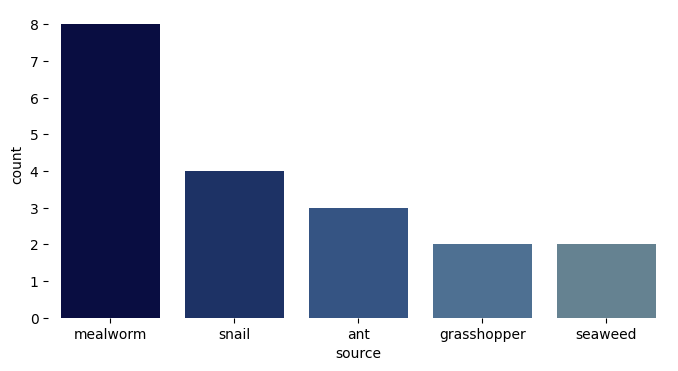

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(df_studies, x= df_studies.index , palette = sns.blend_palette(cm.davos.colors, n_colors=10), order=df_studies.index.value_counts().index)
sns.despine(left=True, bottom=True)

### Missing values

<AxesSubplot: >

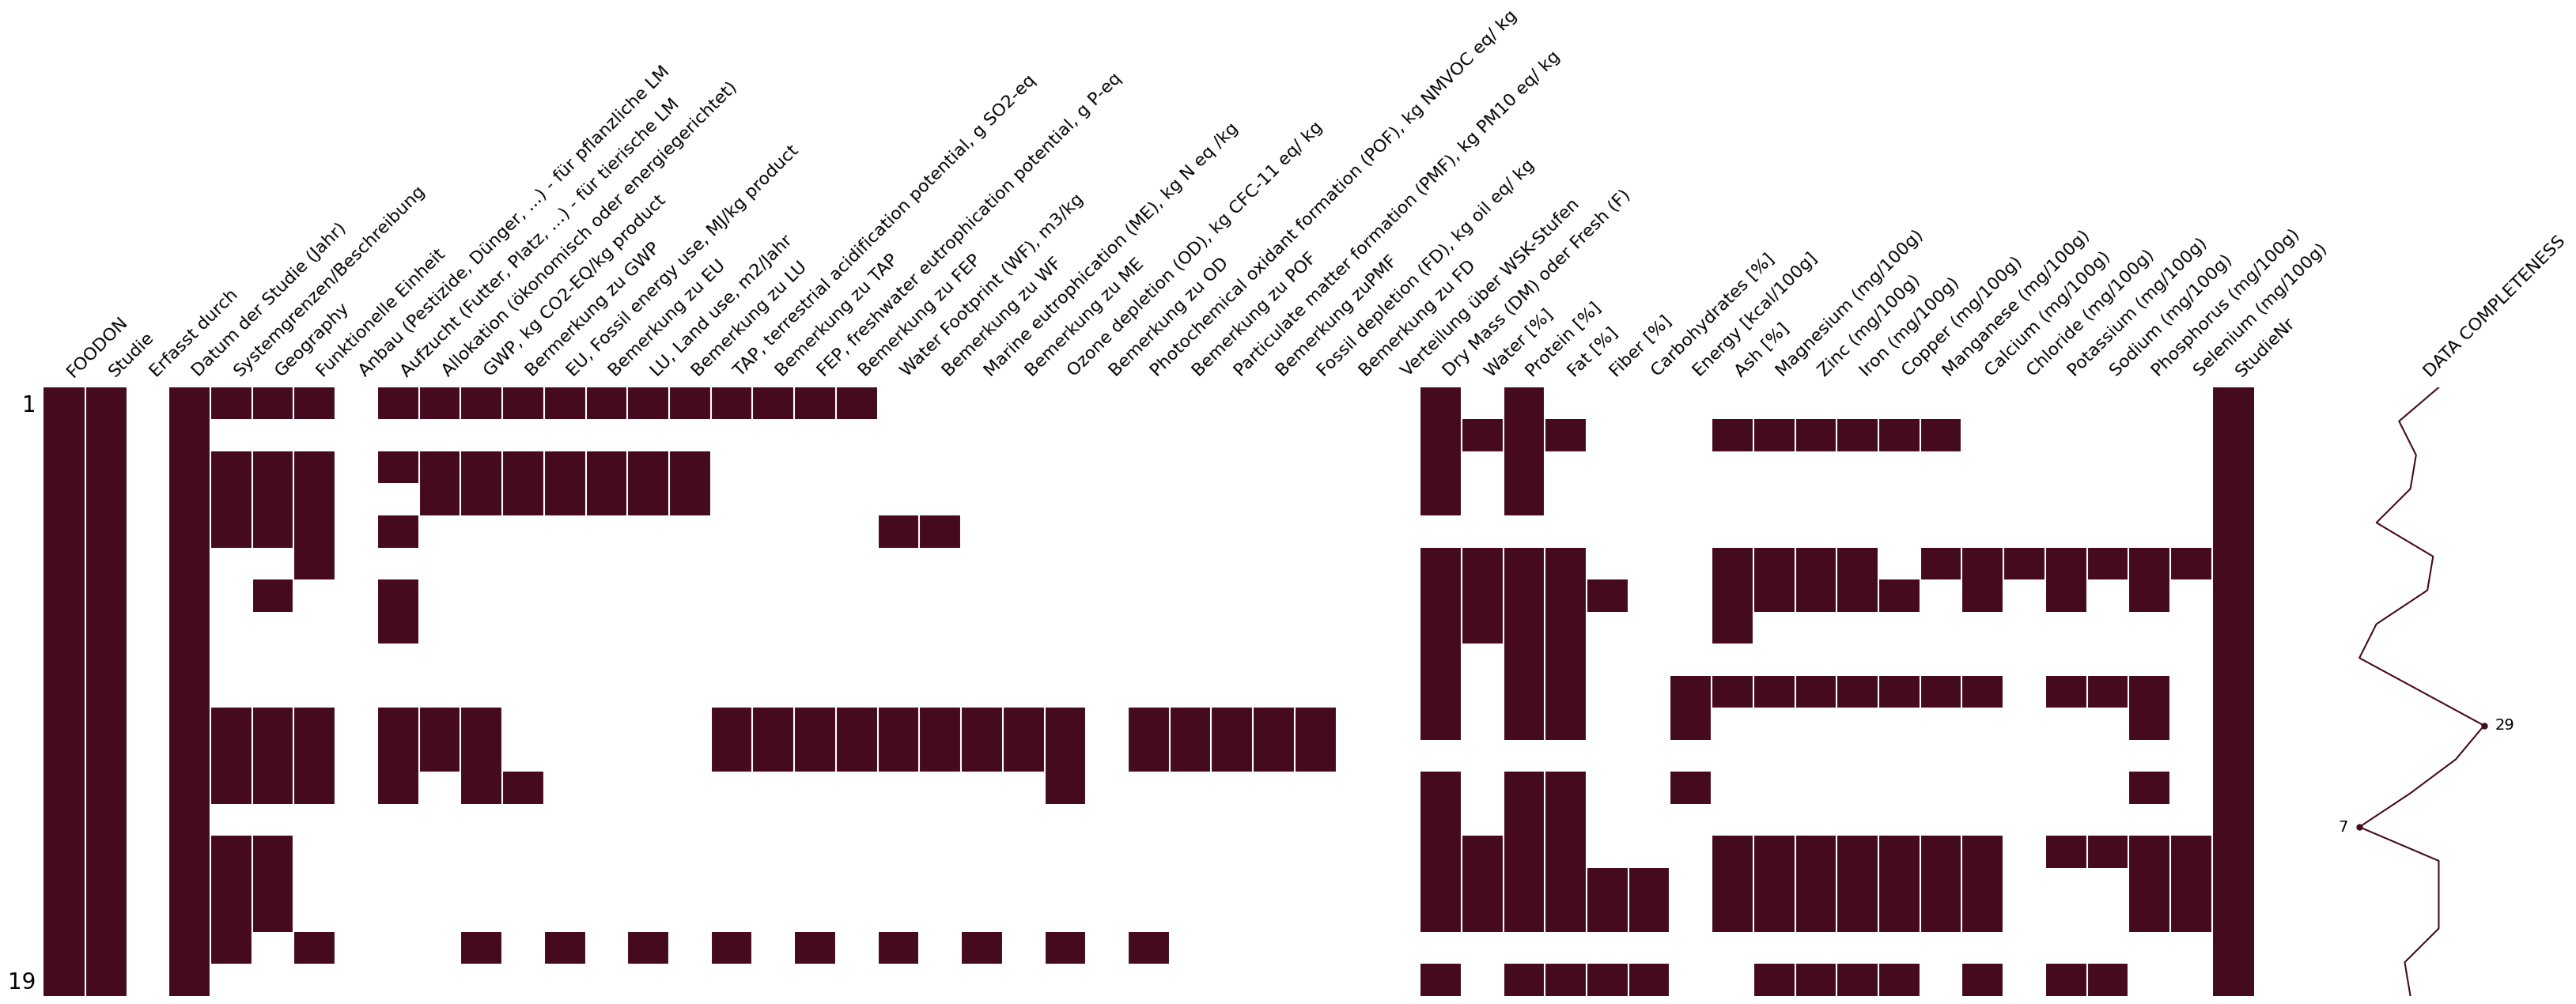

In [14]:
msno.matrix(df_studies, labels=True, color = [0.2784309759 ,0.0392161,0.1176469955], figsize=(40, 10),)

In [15]:
missing = df_studies.isna().sum()[df_studies.isna().sum() > 0]
missing_food =  df_studies.isnull().sum(axis=1)[df_studies.isna().sum(axis=1) > 0]

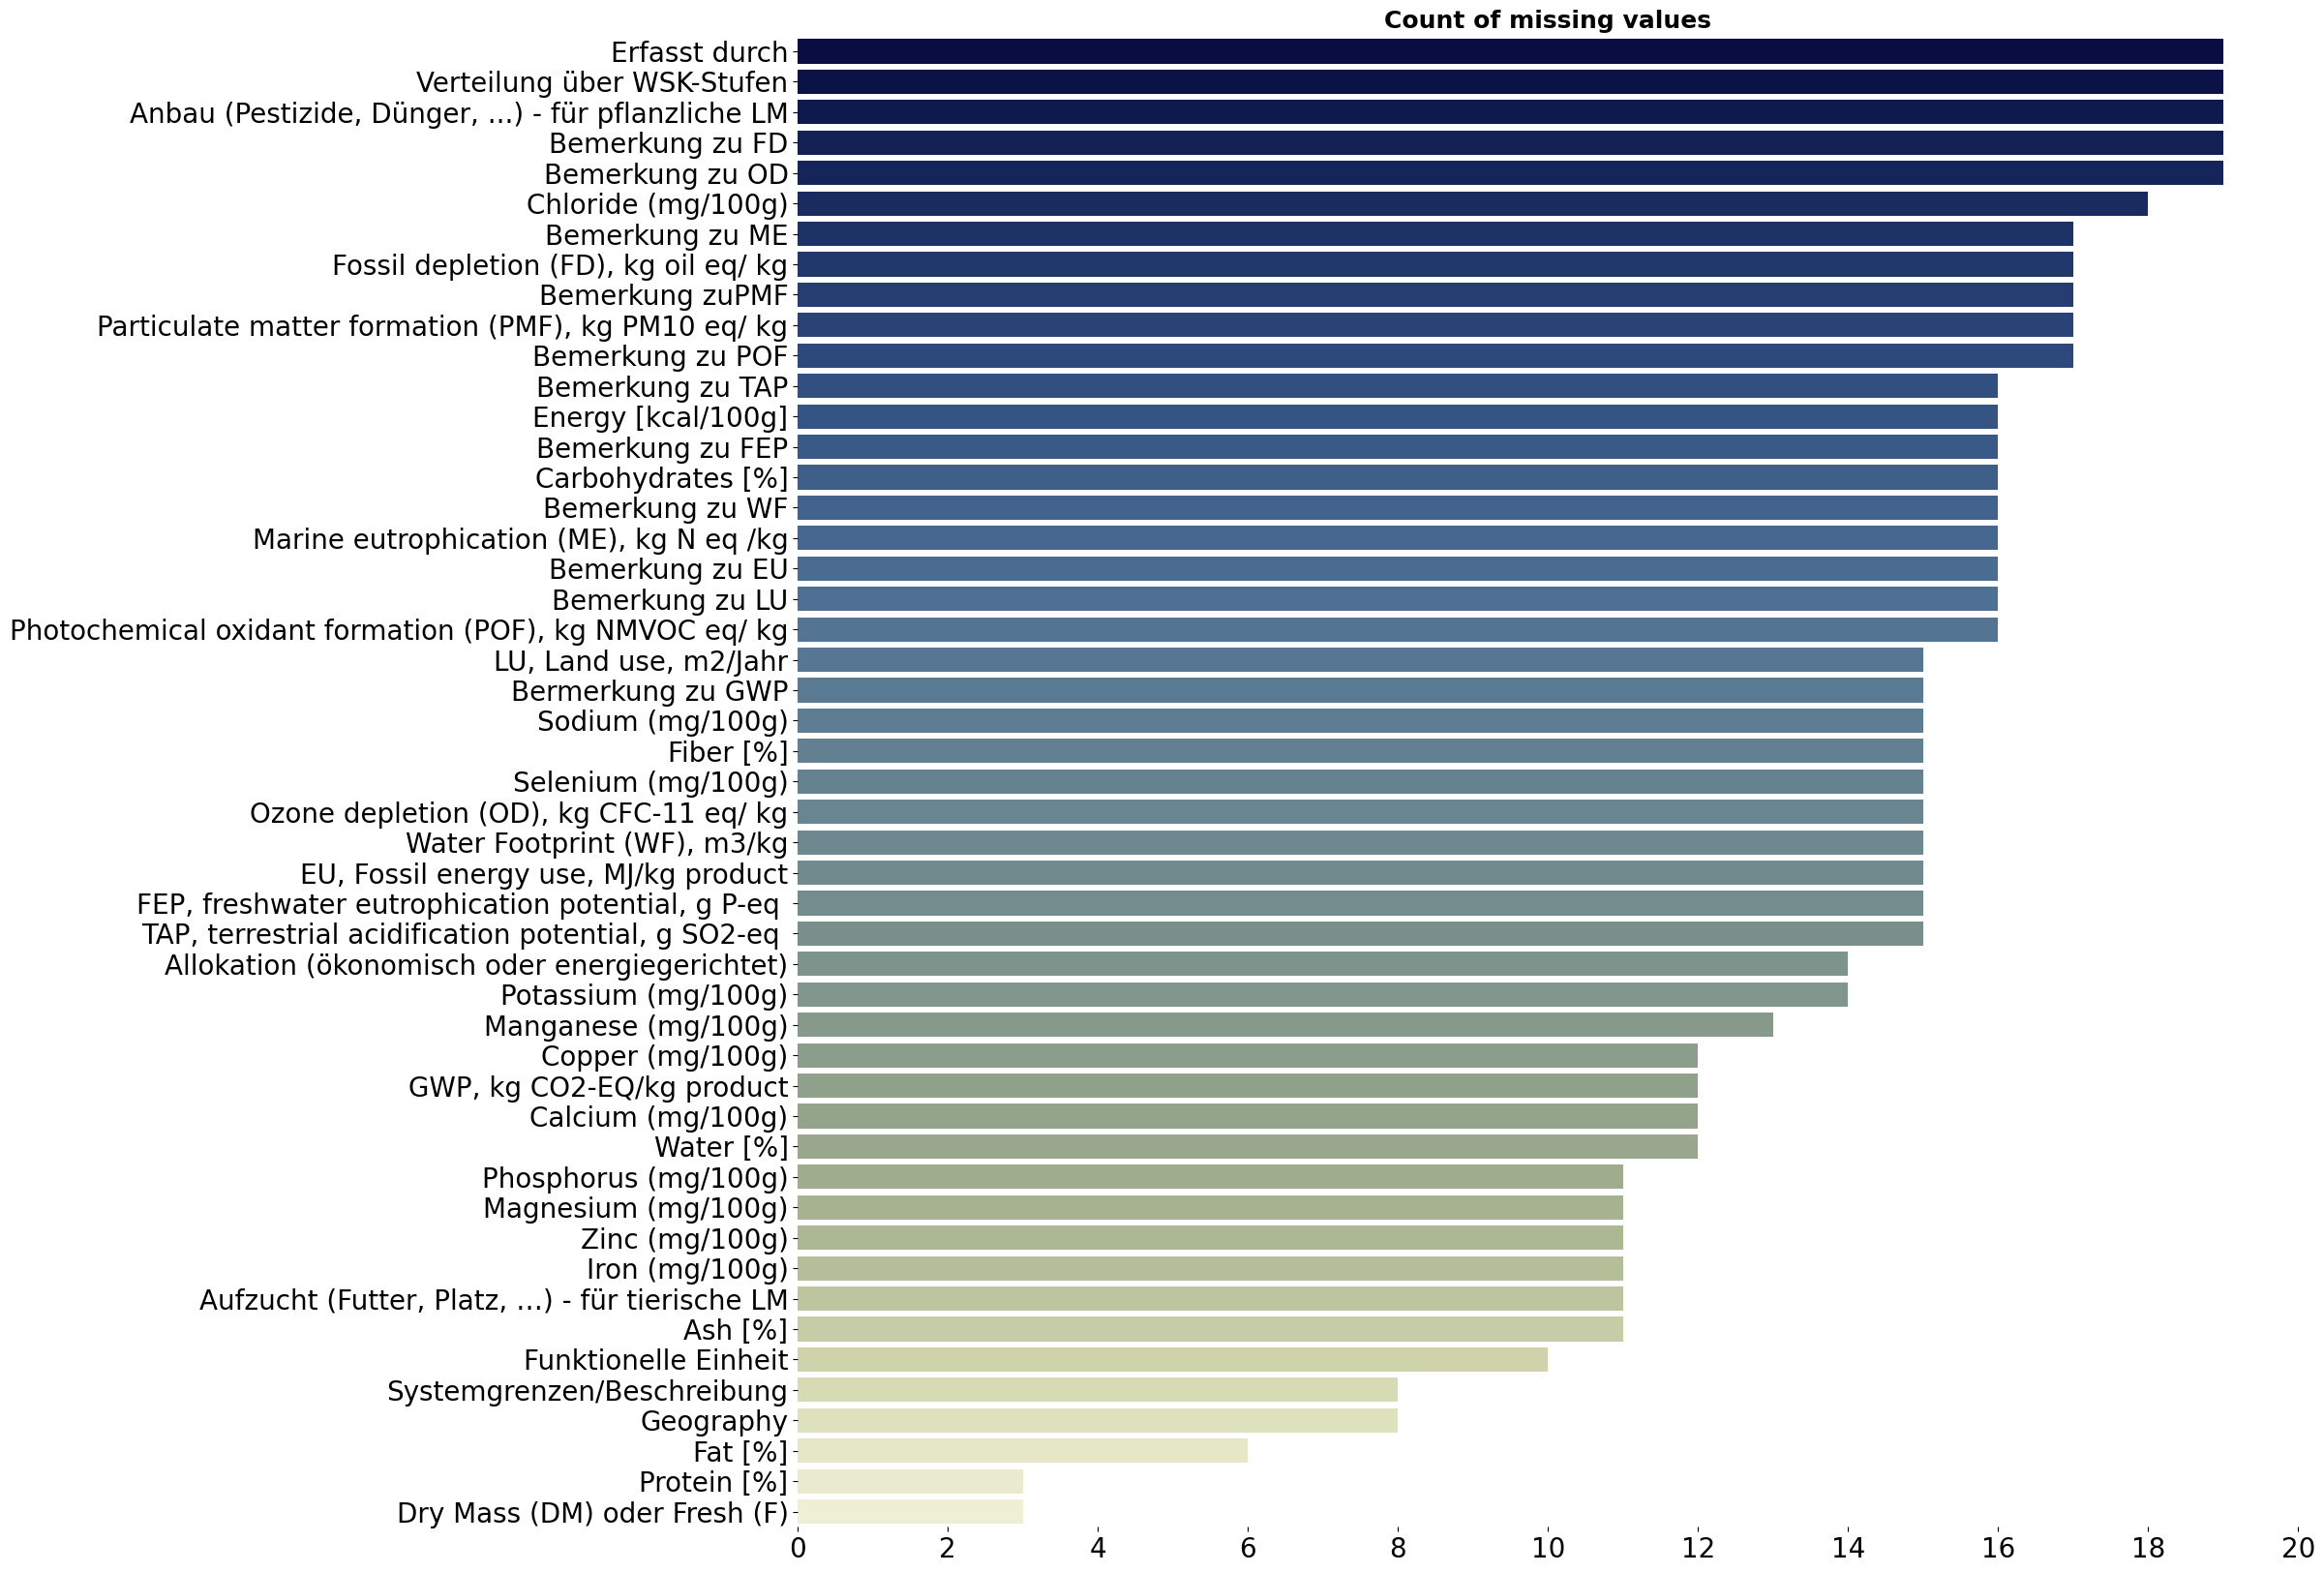

In [16]:
plt.figure(figsize=(20, 20))
sns.barplot(y = missing.index , x = missing, palette=sns.blend_palette(cm.davos.colors, n_colors=55), order = missing.sort_values(ascending=False).index)
plt.yticks(fontsize=20)
plt.xticks(range(0, 21, 2), fontsize=20)
plt.title('Count of missing values',
          fontsize=18, color= 'black', fontweight='bold')
sns.despine(left=True, bottom=True)

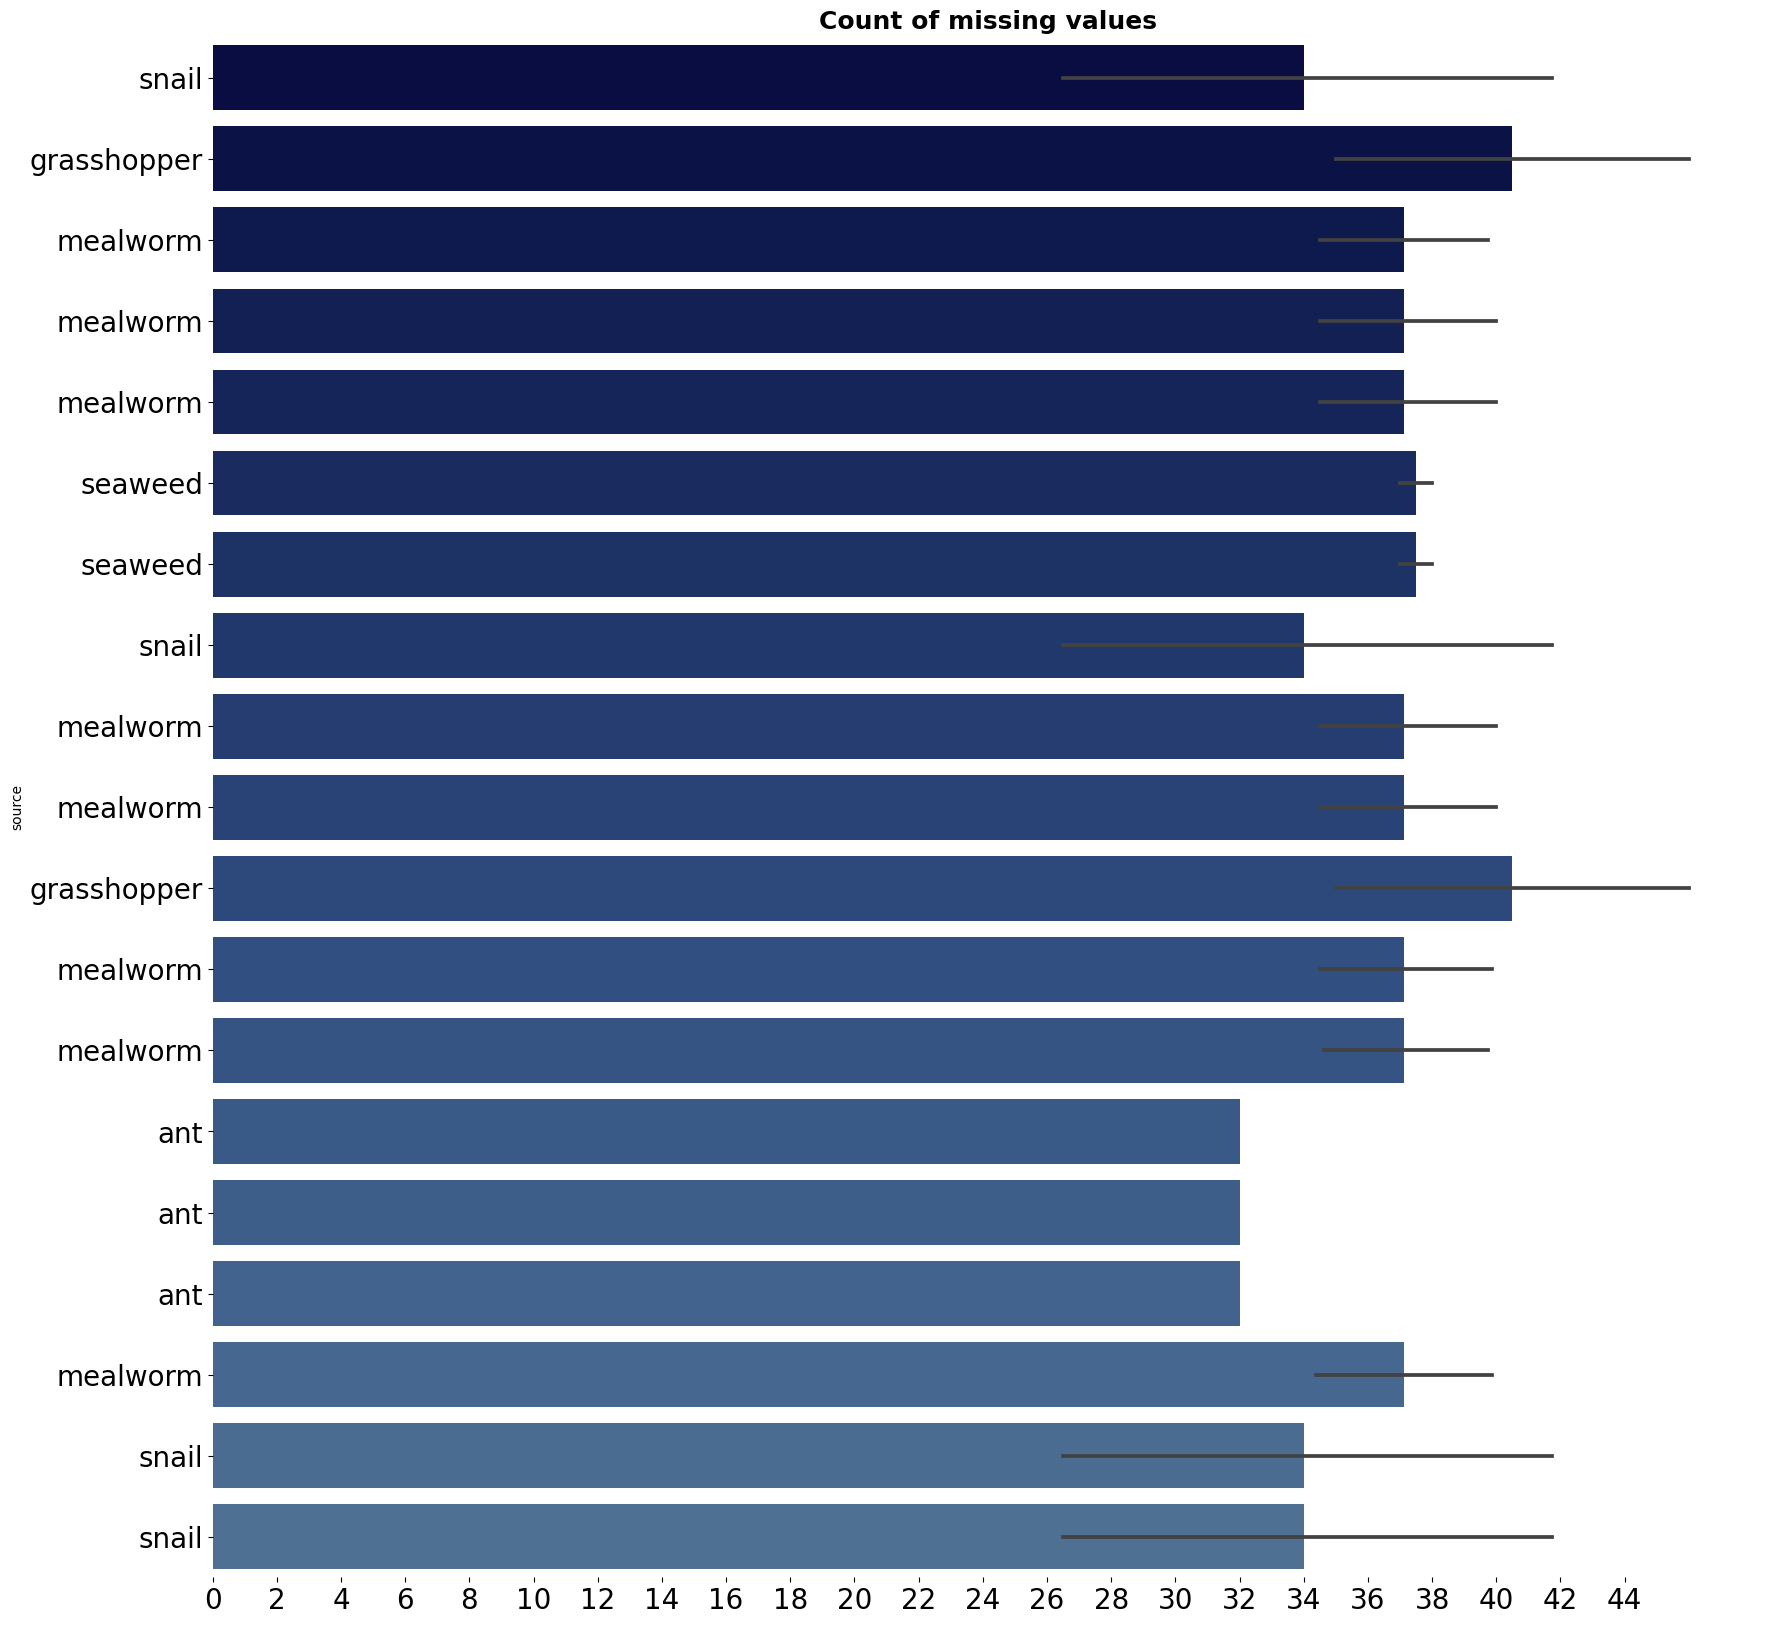

In [17]:
plt.figure(figsize=(20, 20))
sns.barplot(y = missing_food.index , x = missing_food, palette=sns.blend_palette(cm.davos.colors, n_colors=55), order = missing_food.sort_values(ascending=False).index)
plt.yticks(fontsize=20)
plt.xticks(range(0, missing_food.max(), 2), fontsize=20)
plt.title('Count of missing values',
          fontsize=18, color= 'black', fontweight='bold')
sns.despine(left=True, bottom=True)

In [18]:
df_studies.describe()

,FOODON,Erfasst durch,"Anbau (Pestizide, Dünger, ...) - für pflanzliche LM","GWP, kg CO2-EQ/kg product","EU, Fossil energy use, MJ/kg product","LU, Land use, m2/Jahr","Water Footprint (WF), m3/kg","Marine eutrophication (ME), kg N eq /kg",Bemerkung zu OD,"Photochemical oxidant formation (POF), kg NMVOC eq/ kg",...,Iron (mg/100g),Copper (mg/100g),Manganese (mg/100g),Calcium (mg/100g),Chloride (mg/100g),Potassium (mg/100g),Sodium (mg/100g),Phosphorus (mg/100g),Selenium (mg/100g),StudieNr
count,1.900000e+01,0.0,0.0,7.000000,4.00000,4.000000,4.000000,3.000000e+00,0.0,3.000000,...,8.000000,7.000000,6.000000,7.000000,1.0,5.000000,4.000000,8.000000,4.000000,19.000000
mean,1.954576e+06,NaN,NaN,3106.240857,85105.16500,31.295000,1489.925250,2.576667e+06,NaN,0.950690,...,144.382500,4.940000,45.444500,343.822857,181.0,1360.970000,573.862500,432.753750,4.216750,9.000000
std,1.710776e+06,NaN,NaN,8199.080454,169929.90741,34.223561,2966.720855,4.462918e+06,NaN,1.618917,...,324.099996,8.356385,81.776706,629.640707,NaN,1796.727638,682.866565,528.431587,8.058502,5.627314
min,2.524000e+03,NaN,NaN,0.676000,34.00000,3.600000,1.760000,5.550000e-04,NaN,0.003670,...,1.890000,0.450000,0.287000,0.200000,181.0,1.080000,0.150000,0.630000,0.029000,0.000000
25%,2.524000e+03,NaN,NaN,1.700000,138.25000,14.400000,3.695750,2.417500e-03,NaN,0.016035,...,5.247500,1.055000,1.265000,46.280000,181.0,337.000000,37.537500,1.600000,0.035750,4.500000
50%,3.305441e+06,NaN,NaN,5.210000,193.33000,20.190000,8.970500,4.280000e-03,NaN,0.028400,...,15.720000,1.900000,14.820000,108.000000,181.0,947.970000,431.000000,377.850000,0.269000,9.000000
75%,3.411455e+06,NaN,NaN,17.200000,85160.24500,37.085000,1495.200000,3.865000e+06,NaN,1.424200,...,69.775000,3.210000,30.700000,226.000000,181.0,1037.000000,967.325000,489.250000,4.450000,13.500000
max,3.412495e+06,NaN,NaN,21700.000000,340000.00000,81.200000,5940.000000,7.730000e+06,NaN,2.820000,...,940.500000,23.700000,210.000000,1754.000000,181.0,4481.800000,1433.300000,1579.500000,16.300000,18.000000


## Visualisierungen

## scientific colormaps (see http://www.fabiocrameri.ch/visualisation.php)

In [19]:
from colors_cameri import bilbao

## Overview over chosen samples (food products)

### Filter kreiieren

In [20]:
nutrition =  [ 'Water [%]', 'Protein [%]', 'Fat [%]', 'Fiber [%]', 'Carbohydrates [%]',
       'Energy [kcal/100g]', 'Ash [%]', 'Magnesium (mg/100g)',
       'Zinc (mg/100g)', 'Iron (mg/100g)', 'Copper (mg/100g)',
       'Manganese (mg/100g)', 'Calcium (mg/100g)', 'Chloride (mg/100g)',
       'Potassium (mg/100g)', 'Sodium (mg/100g)', 'Phosphorus (mg/100g)',
       'Selenium (mg/100g)']

In [21]:
ecology = [ 'GWP, kg CO2-EQ/kg product', 
       'EU, Fossil energy use, MJ/kg product', 
       'LU, Land use, m2/Jahr', 
       'TAP, terrestrial acidification potential, g SO2-eq ',
        'FEP, freshwater eutrophication potential, g P-eq ',
        'Water Footprint (WF), m3/kg', 'Bemerkung zu WF',
       'Marine eutrophication (ME), kg N eq /kg', 
       'Ozone depletion (OD), kg CFC-11 eq/ kg', 
       'Photochemical oxidant formation (POF), kg NMVOC eq/ kg',
       'Particulate matter formation (PMF), kg PM10 eq/ kg', 
       'Fossil depletion (FD), kg oil eq/ kg']

In [22]:
all_aspects = nutrition + ecology

In [23]:
def filter_data(df = df_studies,
               choice_aspects = all_aspects
               ):

    df = df[['Studie', 'StudieNr'] + choice_aspects]
    
    return df

In [24]:
df_show = filter_data(df = df_studies)

### Compostion of chosen protein sources
 - derzeit pro 100g, manchmal pro 100g Protein
     - 100g protein wäre besser, kann man durch Proteingehalt teilen, leider fehlen Werte
 - Referenzwert nicht nötig, 
 - postive und negative getrennt darstellen
 - muss auf allokation , funktionelle Einheit, etc abgestimmt sein

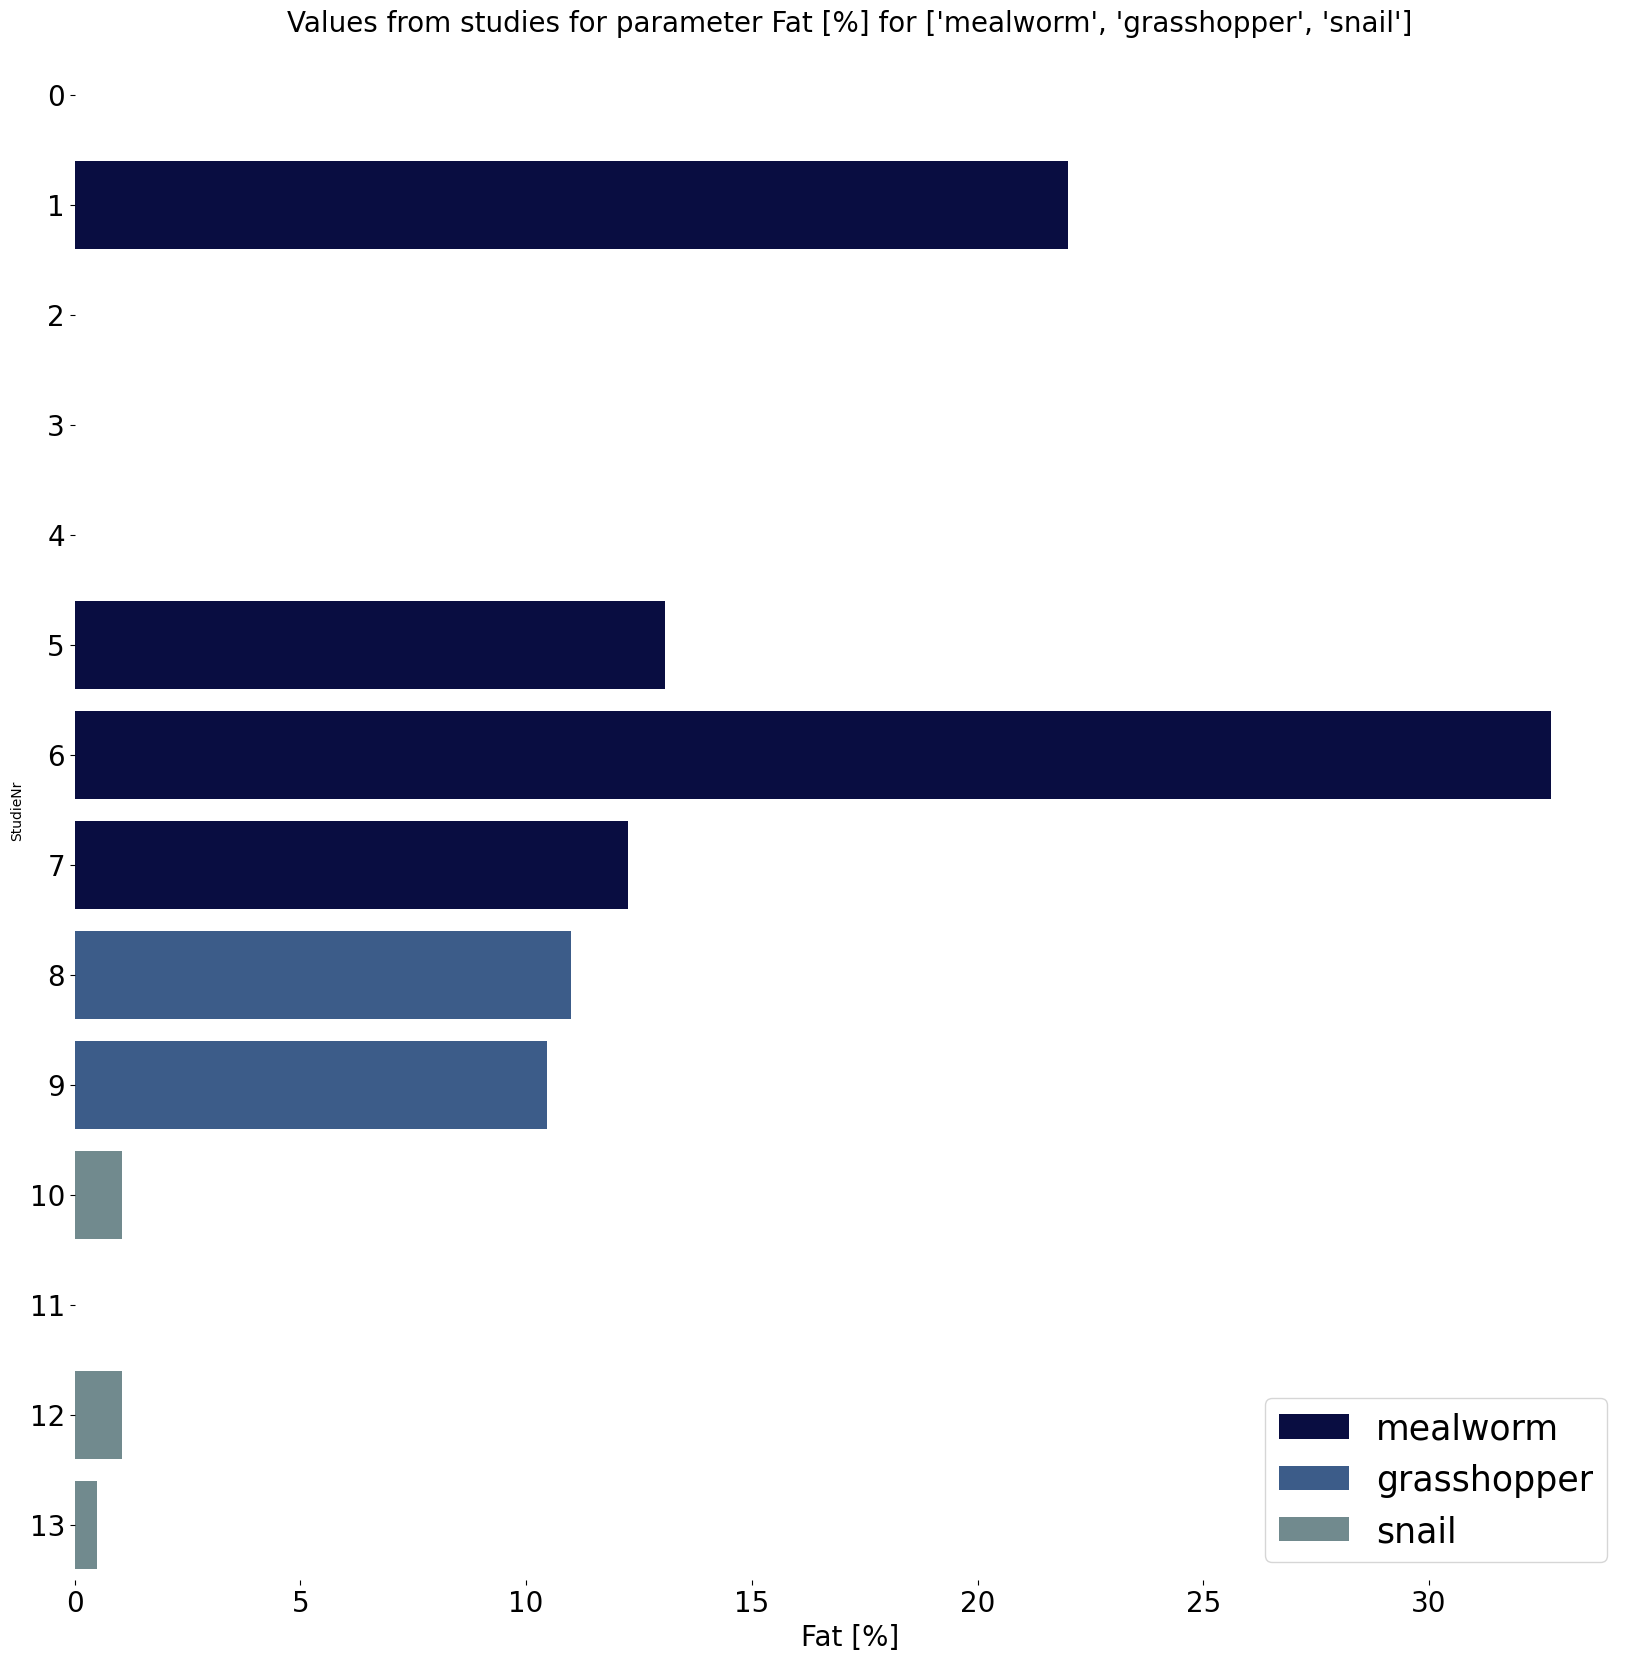

In [25]:
column = 'Fat [%]'
source = ['mealworm', 'grasshopper', 'snail']
df_plot = df_show.loc[source] 
plt.figure(figsize=(20,20))
plt.title('Values from studies for parameter {} for {}'.format(column, source), fontsize = 20)
sns.barplot(df_plot, y = df_plot['StudieNr'], x = df_plot[column],
            orient='h', 
            palette=sns.blend_palette(cm.davos.colors, n_colors=5),
            hue = df_plot.index, 
           dodge=False, )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(column, fontsize = 20)
plt.legend(fontsize=25)
sns.despine(left=True, bottom=True)

In [26]:
davos_rgb = [el[1] for el in davos]

In [27]:
list(range(1, len(df_plot['Studie']), 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

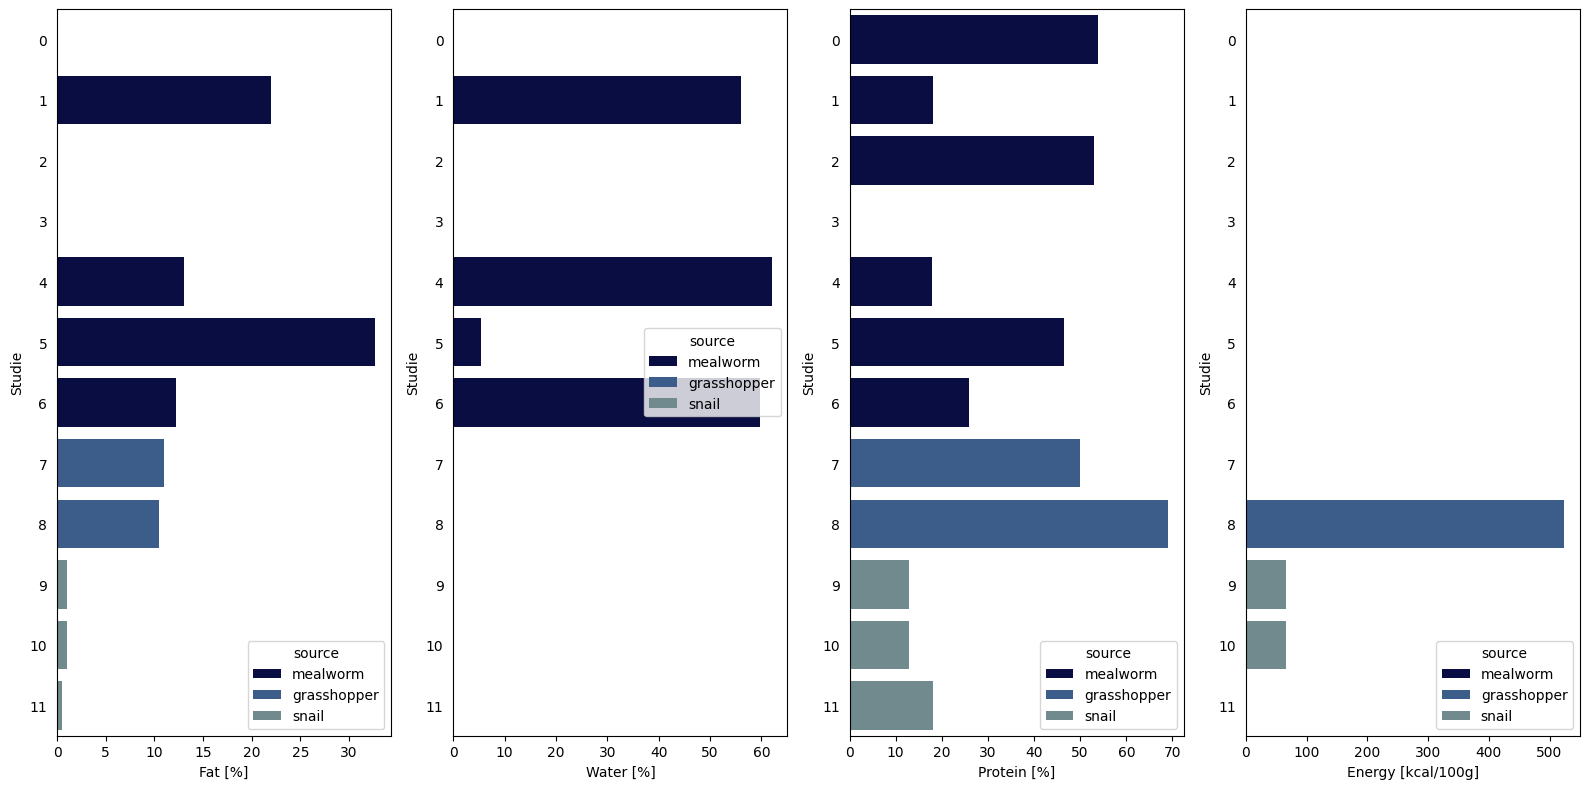

In [28]:
column = ['Fat [%]', 'Water [%]', 'Protein [%]', 'Energy [kcal/100g]',]
ncols = len(column)
source = ['mealworm', 'grasshopper', 'snail']

df_plot = df_show.loc[source] 
fig, axes = plt.subplots(1, ncols, figsize=(16, 8), tight_layout=True)

# plt.figure(figsize=(27, 88)) 
for name, ax in zip(column, axes.flatten()):
    sns.barplot(df_plot, y = df_plot['Studie'], x = df_plot[name],
                palette=sns.blend_palette(cm.davos.colors, n_colors=5 ),
                hue = df_plot.index, 
               dodge=False, ax=ax)
    ax.set(yticklabels= df_plot['StudieNr'][:12])
    ax.tick_params(left=False)

    plt.subplots_adjust(hspace=0.2)

### Ranges of study results
- studien müssen normiert sein  - muss auf allokation , funktionelle Einheit, etc abgestimmt sein
 - Referenzwert nicht nötig, 
 - postive und negative getrennt können zusammen dargestellt werden - Balken gehen nicht hinauf


Text(0.5, 1.0, 'Distribution of study results for mealworm. Count of studies included: 8')

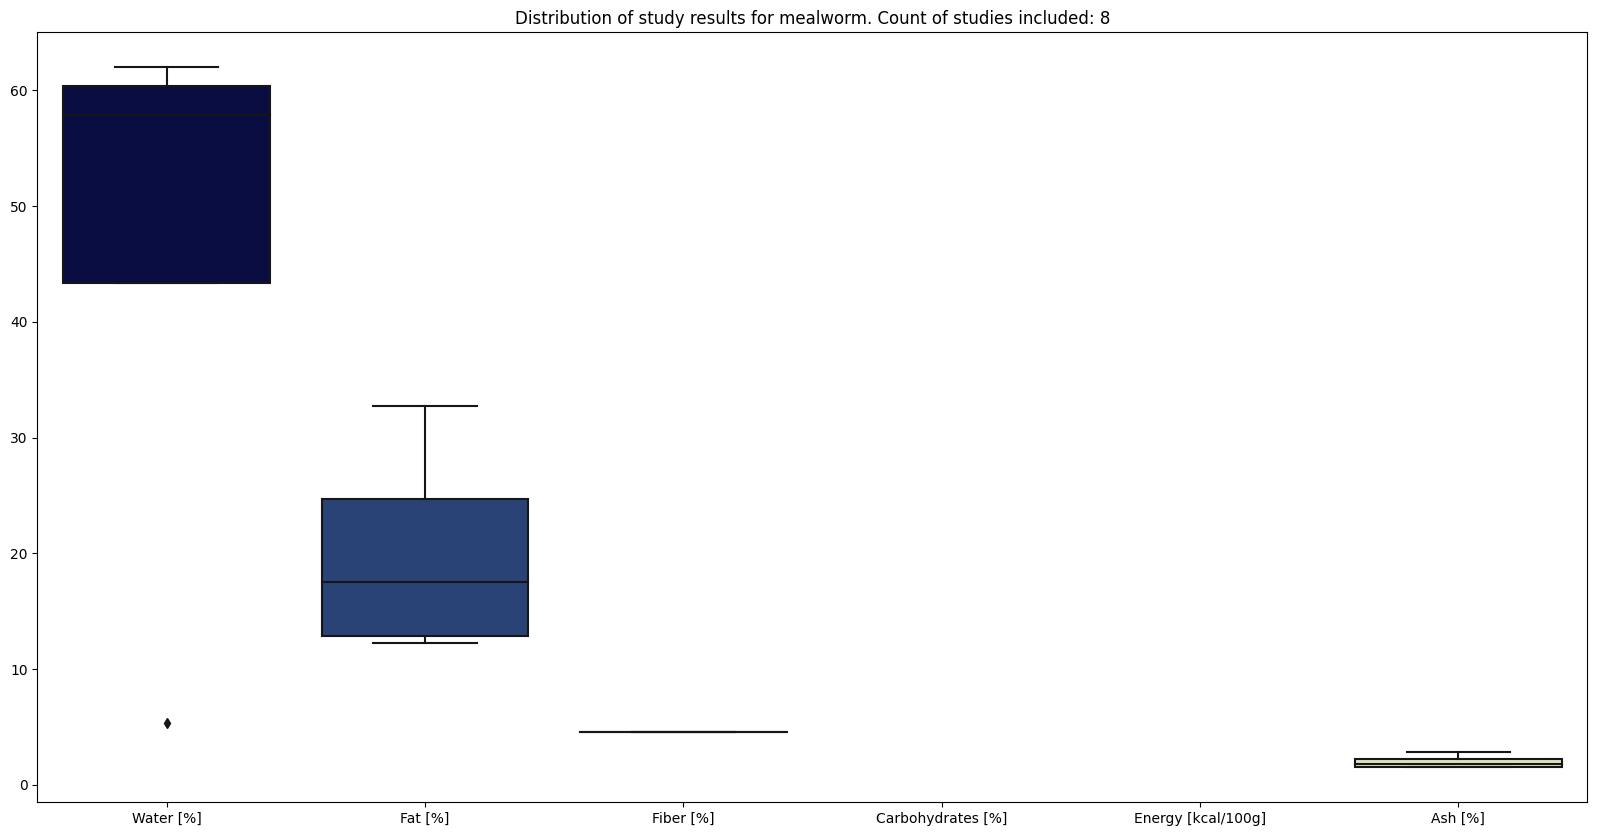

In [29]:
columns = ['Water [%]',  'Fat [%]', 'Fiber [%]',
       'Carbohydrates [%]', 'Energy [kcal/100g]', 'Ash [%]']

# source = 'snail'
source = 'mealworm'

df = df_show.loc[source][columns]

plt.figure(figsize = (20, 10))
sns.boxplot(df, orient = 'v', palette=sns.blend_palette(cm.davos.colors, n_colors=7))
plt.title('Distribution of study results for {}. Count of studies included: {}'.format(source, df.shape[0]))
# plt.yscale('log')